# Scipy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basics 

### Optimization

In [6]:
from scipy.optimize import minimize 

minimize $f(x) = (x-3)^2$

In [27]:
def f(x):
    return (x-3)**2

res = minimize(f,2)
res.x[0]

2.999999992549203

Minimize  s.t.

$$
\begin{array}
 f(x) &=& (x-1)^2+(y-2.5)^2\\
 &s.t&\\
x - 2y +2 &\geq& 0\\
-x - 2y +6 &\geq& 0\\
-x + 2y +2 &\geq& 0\\
x  &\geq& 0\\
y  &\geq& 0\\
\end{array}
$$

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular

In [32]:
#use lambda function (to change in the definition)
f = lambda x : (x[0]-1)**2+(x[1]-2.5)**2
f(1,2)

0.25

In [40]:

f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [42]:
res.x

array([1.4, 1.7])

In [46]:
#minimize?

### Interpolation

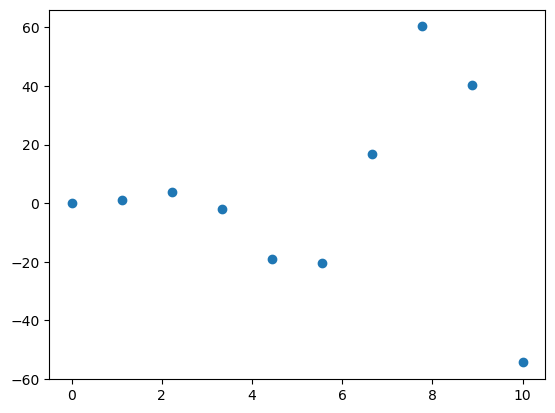

In [50]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [56]:
from scipy.interpolate import interp1d
f = interp1d(x,y, kind="cubic")
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

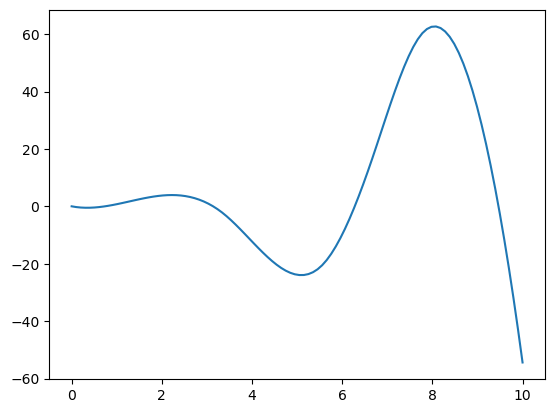

In [60]:
plt.plot(x_dense, y_dense);

### Curve Fitting

In [78]:

x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

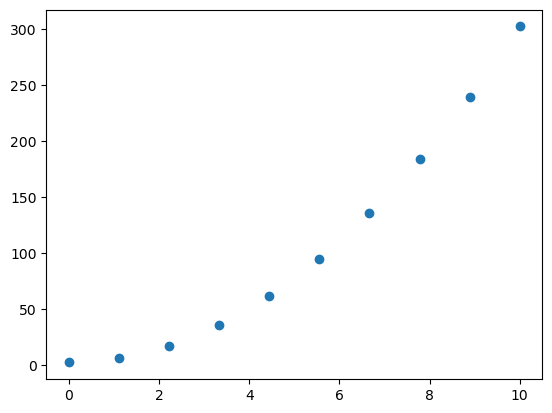

In [80]:
plt.scatter(x_data, y_data);

Whant to fit the data to the curve $y = ax^2 + b$ The main goal here is to determine the values of $a$ and $b$

In [83]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

The equation for srping motion is $y(t) = Acos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [86]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

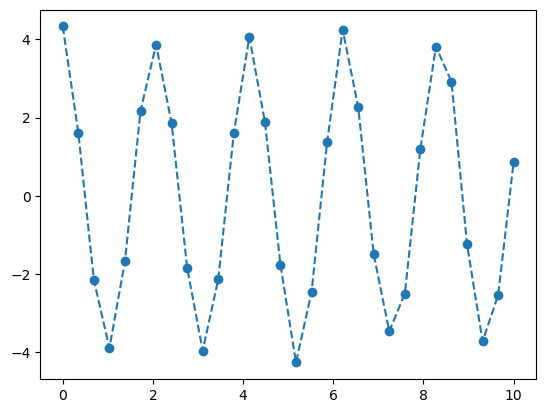

In [96]:
plt.plot(t_data, y_data,"o--");

$\omega = 2\pi f, f = 1/T$ and $T \approx 2$ seconds. Thus good initial guess is:
- $\omega = 2\pi(1/2) = \pi$
- $A = 4$
- $\phi = 0$

In [99]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

In [101]:
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [105]:
A, w, phi = popt

In [107]:
t = np.linspace(0,10,100)
y = func(t, A, w, phi)

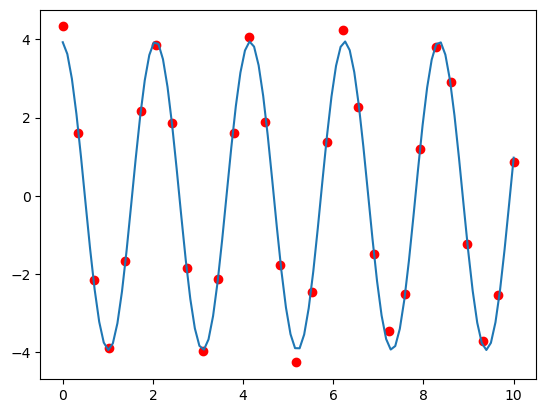

In [113]:
plt.plot(t, y)
plt.scatter(t_data, y_data, c="r")

In [117]:
np.diag(pcov)

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

In [119]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575701])

### Special Functions

Legendre Polynomials $P_l(x)$: satisfies $(1-x^2)y''-2xy'+l(l+1)y = 0$

- The angular component of the spherical Schroedinger equation which permetis non-infinite solutions

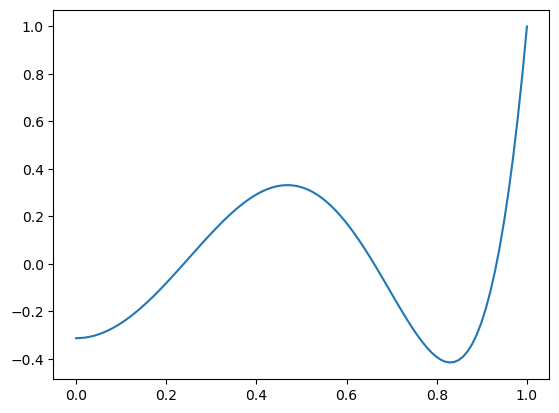

In [124]:
from scipy.special import legendre
x = np.linspace(0,1,100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel function $J_a(x)$ satisfies $x^2y''+xy'+(x^2-\alpha^2)y=0$

- Laplace's Equation in Polar Coordinates

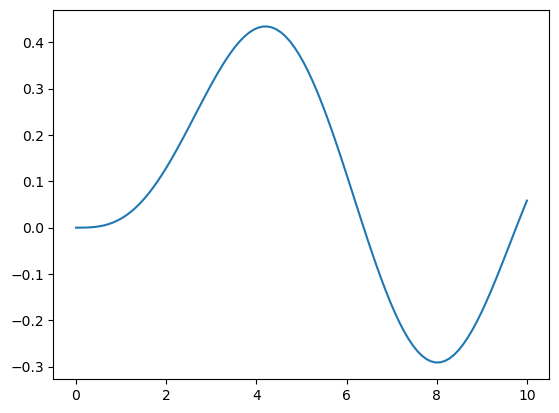

In [127]:
from scipy.special import jv
x = np.linspace(0,10, 100)
plt.plot(x, jv(3,x))
plt.show()

## Calculus

In Numpy, we provide an array of values and we are able to compute the derivatives or the integration. In Scipy, we provide a function and this is the basis of the derivation and integration evaluation. Now this is kinda tricky since at the of the day even if we write a function, we pass an array, this function will return an array so ...

### Differentiation

In [153]:
from scipy.misc import derivative

In [155]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1, 100)

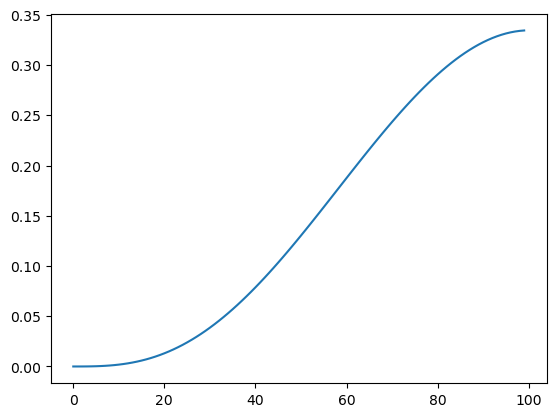

In [157]:
plt.plot(f(x));

In [161]:
derivative(f, x, dx=1e-6)

C:\Users\j077574\AppData\Local\Temp\ipykernel_32072\4183743391.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, x, dx=1e-6)


array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

### Integration
Single integrals 
$$
\int_0^{1} x^2 sin(2x)e^{-x} dx
$$

In [166]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0,1)

In [168]:
integral, integral_error

(0.14558175869954834, 1.6162822047366225e-15)

Double integral
$$
\int_0^{1} \int_{-x}^{x^2} sin(x+y^2)dydx
$$

In [172]:
from scipy.integrate import dblquad
integrand = lambda x,y : np.sin(x +y**2)
lw_y = lambda x: -x
up_y = lambda x: x**2
# note that the bounds are functions here because it is the case in our integral
integral, integral_error = dblquad(integrand, 0,1, lw_y, up_y)

In [178]:
integral, integral_error

(0.315802507240474, 1.5634600713498928e-14)

## Differential Equations
### First Order ODEs

Air friction while failing:

$$
v' - av^2 + \beta = 0 ; v(0) = 0
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [182]:
from scipy.integrate import odeint #solve_ivp

All information about differential equation

In [217]:
def dvdt(v,t):
    return 3*v**2 - 5 # we do dv/dt = ... so we need to have the derivative on one side !!!
v0 = 0

In [219]:
#solve
t = np.linspace(0,1, 100)
sol = odeint(dvdt, v0, t)
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

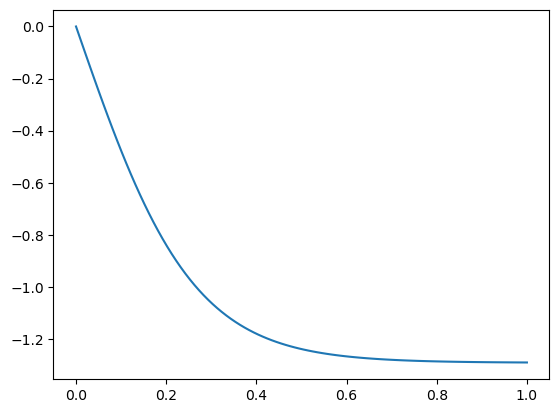

In [225]:
plt.plot(t, sol);

### Coupled first order ODEs
$$
\begin{array}{rclcr}
y_1' &=& y_1 + y_2^2 + 3x &;& y_1(0) = 0\\
y_2' &=& 3y_1 + y_2^3 - cos(x) &;& y_2(0) = 0
\end{array}
$$
Letting $S  (y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$

In [237]:
def dSdx(S, x):
    y1, y2 = S
    return [y1+y2**2+3*x, 3*y1 + y2**2-np.cos(x)]

y10, y20 = 0, 0
S0 = (y10, y20)

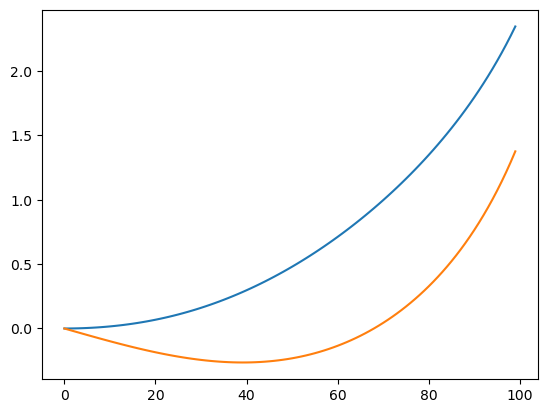

In [255]:
x = np.linspace(0,1,100)
sol = odeint(dSdx, S0, x)
y1 = sol[:,0]
y2 = sol[:,1]
plt.plot(y1)
plt.plot(y2)

### Second Order ODEs
Equation for a pendulum
$$
\theta'' - sin(\theta) = 0
$$
Scipy can only solve coupled first order ODEs but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs

Define $\omega = \frac{d\theta}{dt}$ so the one has the following coiples ODEs

$$
\begin{array}{rcr}
\frac{d\omega}{dt} &=& sin(\theta)\\
\frac{d\theta}{dt} &=& \omega\\
\end{array}
$$

let $S = (\theta, \omega)$

In [264]:
def dSdt(S,t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0, omega = np.pi/4, 0
S0 = (theta0, omega)

In [266]:
t = np.linspace(0,20,100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

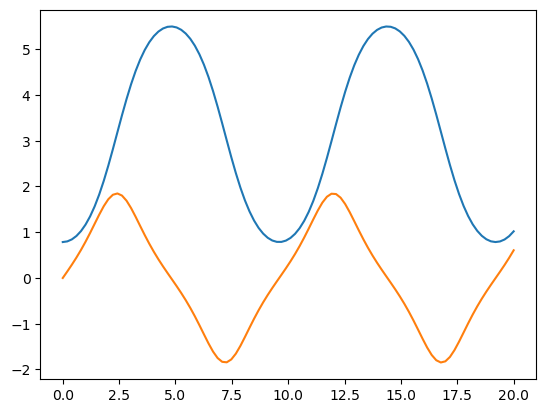

In [268]:
plt.plot(t, theta)
plt.plot(t, omega)

## Fourier transforms
The discrete Fourier transform is defined as 
$$
y[k] = \sum_{n=0}^{N-1} e^{-2\pi in(k/N})x[n]
$$
* $k/N$ represents a specific frequency (dimensionless)
* Can be converted to a frequency (Hz) if you know the spacing in x

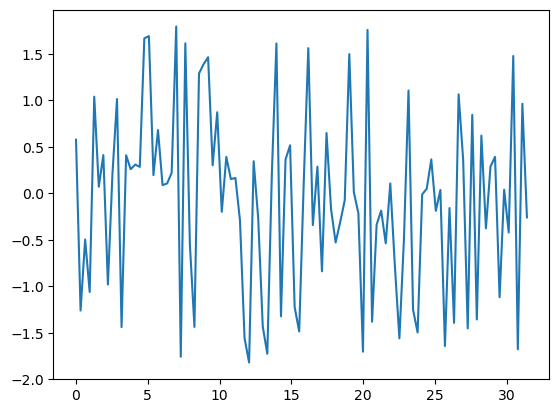

In [288]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(t,x)

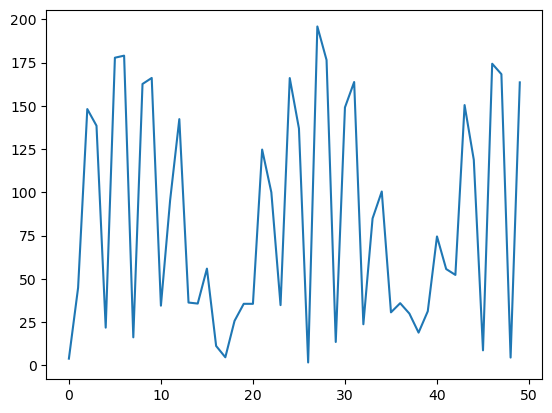

In [296]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(y)[:N//2]
plt.plot(np.abs(y))

In [300]:
f = fftfreq(N, np.diff(t)[0])

## Linear Algebra
- Basics
- Eigenvalue Problems
- Special Matrices
- Decompostion
- Sparse Matrices
- 

## Cholesky decomposition -> autocorrelation of sequences !!!

## Statistics
